# Importações


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine



# Configuções Iniciais


In [ ]:
plt.style.use('default')

# Caminhos relativos para os dados na mesma pasta que o notebook

In [ ]:
data_paths = {
    'BNB': 'moedas/coin_BinanceCoin.csv',
    'BTC': 'moedas/coin_Bitcoin.csv',
    'ADA': 'moedas/coin_Cardano.csv',
    'DOGE': 'moedas/coin_Dogecoin.csv',
    'ETH': 'moedas/coin_Ethereum.csv',
    'LTC': 'moedas/coin_Litecoin.csv',
    'SOL': 'moedas/coin_Solana.csv',
    'USDT': 'moedas/coin_Tether.csv',
    'TRX': 'moedas/coin_Tron.csv',
    'USDC': 'moedas/coin_USDCoin.csv'
}



# Carregar os dados

In [ ]:
dfs = {}
for key, path in data_paths.items():
    try:
        df = pd.read_csv(path)
        if 'Close' in df.columns:
            dfs[key] = df
        else:
            print(f"A coluna 'Close' não está presente em {key}.")
    except FileNotFoundError:
        print(f"Arquivo não encontrado: {path}")
    except pd.errors.EmptyDataError:
        print(f"Arquivo vazio: {path}")
    except Exception as e:
        print(f"Erro ao ler {path}: {e}")

# Verificar se os dados foram carregados corretamente

In [ ]:
for key, df in dfs.items():
    print(f"{key} dataframe shape: {df.shape}")
    print(df.head())

BNB dataframe shape: (1442, 10)
   SNo          Name Symbol                 Date      High       Low  \
0    1  Binance Coin    BNB  2017-07-26 23:59:59  0.109013  0.099266   
1    2  Binance Coin    BNB  2017-07-27 23:59:59  0.108479  0.100888   
2    3  Binance Coin    BNB  2017-07-28 23:59:59  0.109019  0.101473   
3    4  Binance Coin    BNB  2017-07-29 23:59:59  0.111264  0.101108   
4    5  Binance Coin    BNB  2017-07-30 23:59:59  0.108138  0.103162   

       Open     Close    Volume   Marketcap  
0  0.105893  0.105138  200395.0  10513800.0  
1  0.105108  0.107737  344499.0  10773700.0  
2  0.107632  0.104067  342568.0  10406700.0  
3  0.104782  0.107811  340218.0  10781100.0  
4  0.107935  0.106414  224261.0  10641400.0  
BTC dataframe shape: (2991, 10)
   SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoi

# Função para limpar os dados

In [ ]:
def clean_data(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df = df[['Close']]
    df = df.apply(pd.to_numeric, errors='coerce')
    return df

# Limpar todos os datasframes


In [ ]:
for key in dfs:
    try:
        dfs[key] = clean_data(dfs[key])
        dfs[key].rename(columns={'Close': key}, inplace=True)
    except Exception as e:
        print(f"Erro ao limpar dados de {key}: {e}")

# Unir todos os dataframes em um só

In [ ]:
crypto_df = pd.concat(dfs.values(), axis=1)

# Verificar os dados consolidados


In [ ]:
print(crypto_df.head())

                     BNB         BTC  ADA  DOGE  ETH      LTC  SOL  USDT  TRX  \
Date                                                                            
2013-04-29 23:59:59  NaN  144.539993  NaN   NaN  NaN  4.38390  NaN   NaN  NaN   
2013-04-30 23:59:59  NaN  139.000000  NaN   NaN  NaN  4.29649  NaN   NaN  NaN   
2013-05-01 23:59:59  NaN  116.989998  NaN   NaN  NaN  3.80101  NaN   NaN  NaN   
2013-05-02 23:59:59  NaN  105.209999  NaN   NaN  NaN  3.37198  NaN   NaN  NaN   
2013-05-03 23:59:59  NaN   97.750000  NaN   NaN  NaN  3.04491  NaN   NaN  NaN   

                     USDC  
Date                       
2013-04-29 23:59:59   NaN  
2013-04-30 23:59:59   NaN  
2013-05-01 23:59:59   NaN  
2013-05-02 23:59:59   NaN  
2013-05-03 23:59:59   NaN  


# Análise Exploratória


 1. Tendências históricas


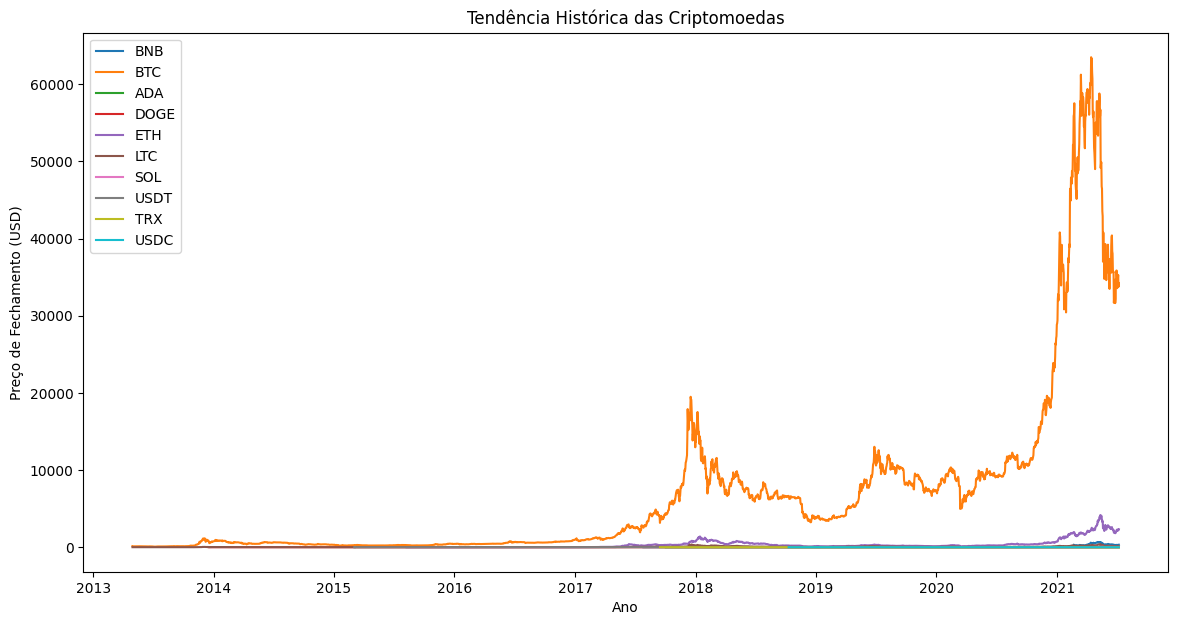

In [ ]:
plt.figure(figsize=(14, 7))
for column in crypto_df.columns:
    if np.issubdtype(crypto_df[column].dtype, np.number):
        plt.plot(crypto_df[column], label=column)
plt.legend()
plt.title('Tendência Histórica das Criptomoedas')
plt.xlabel('Ano')
plt.ylabel('Preço de Fechamento (USD)')
plt.show()

2. Valores Médios

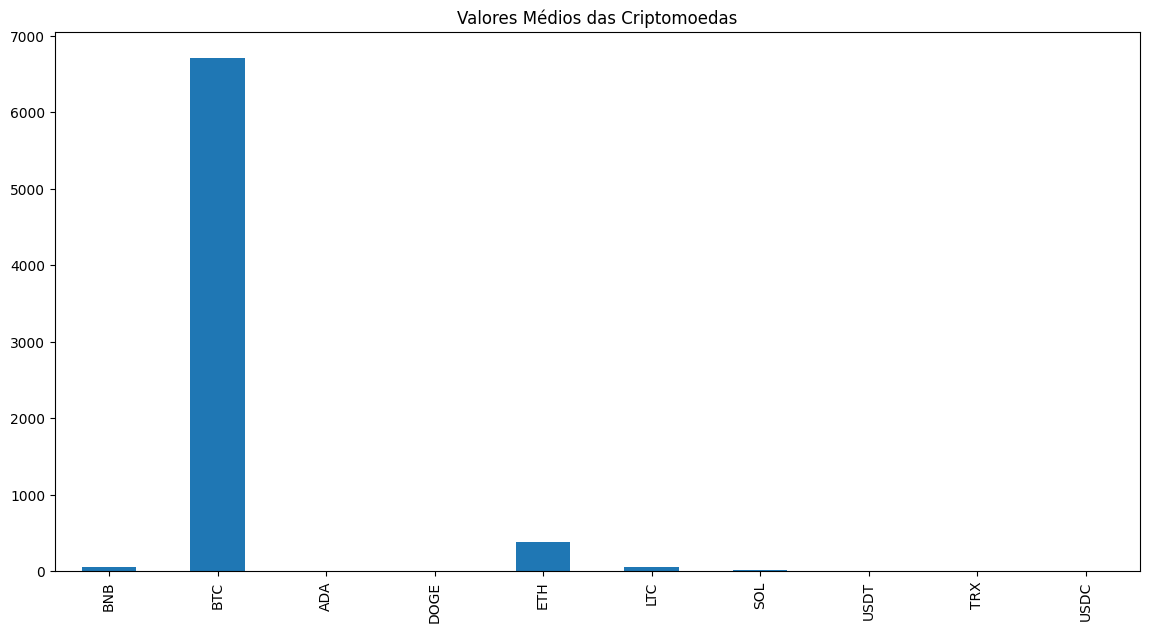

In [ ]:
mean_values = crypto_df.mean()
plt.figure(figsize=(14, 7))
mean_values.plot(kind='bar')
plt.title('Valores Médios das Criptomoedas')
plt.show()

3. Variação Anual

C:\Users\3668822024.1\AppData\Local\Temp\ipykernel_4900\3597391578.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_returns = crypto_df.resample('Y').ffill().pct_change() * 100


<Figure size 1400x700 with 0 Axes>

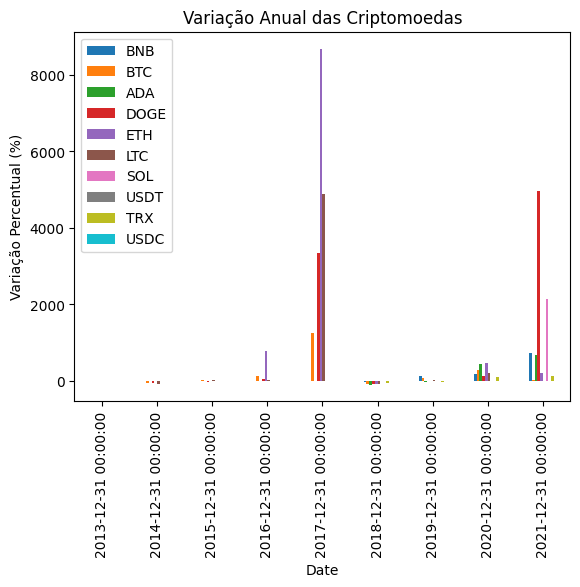

In [ ]:
annual_returns = crypto_df.resample('Y').ffill().pct_change() * 100
plt.figure(figsize=(14, 7))
annual_returns.plot(kind='bar')
plt.title('Variação Anual das Criptomoedas')
plt.ylabel('Variação Percentual (%)')
plt.show()

4. Análise por dia da semana

<Figure size 1400x700 with 0 Axes>

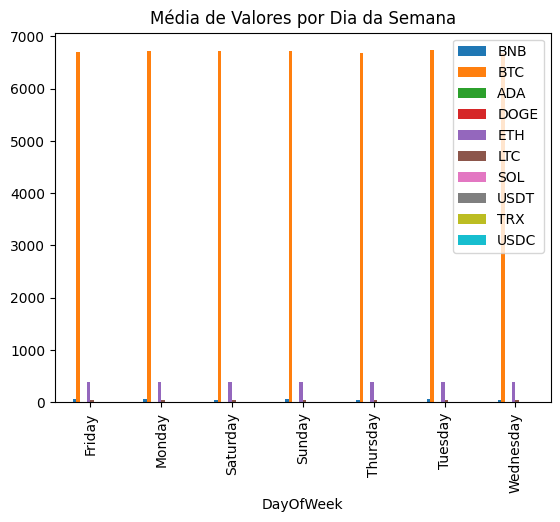

In [ ]:
crypto_df['DayOfWeek'] = crypto_df.index.day_name()
mean_by_day = crypto_df.groupby('DayOfWeek').mean()
plt.figure(figsize=(14, 7))
mean_by_day.plot(kind='bar')
plt.title('Média de Valores por Dia da Semana')
plt.show()

5. Moeda mais interessante


6. Moeda menos interessante


7. Correlação entre os valores para todas as criptomoedas

 *** PERGUNTA EXTRA 1 ***


8. Qual é a distribuição dos valores para cada criptomoeda?

*** PERGUNTA EXTRA 2 ***

9. Qual foi o maior e o menor valor registrado para cada criptomoeda ao longo do período analisado?

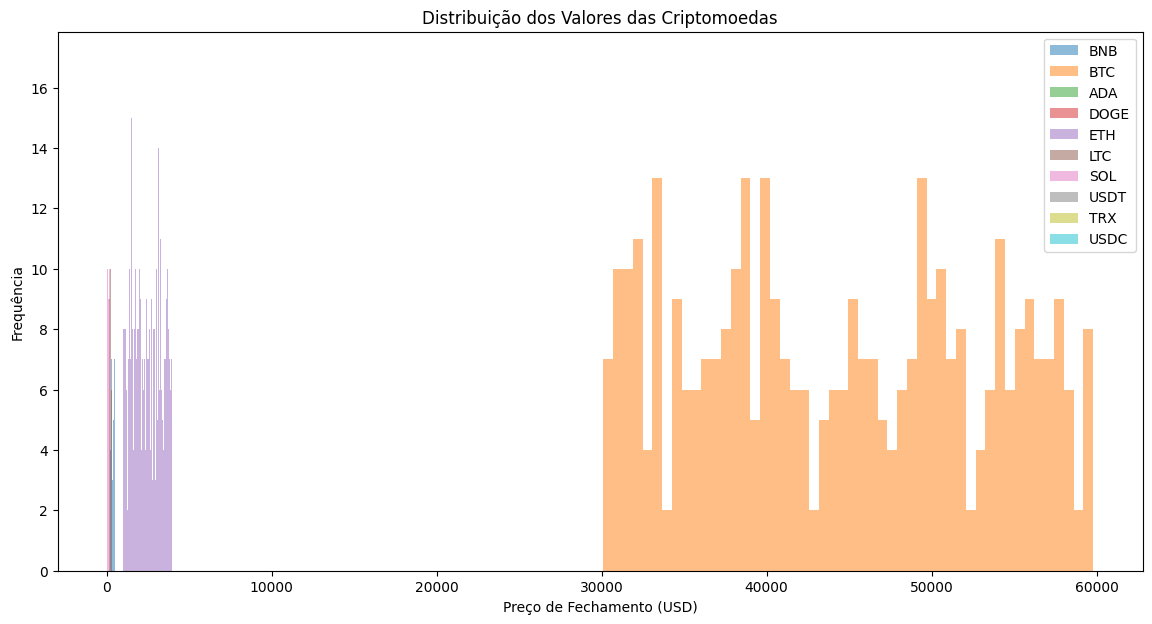

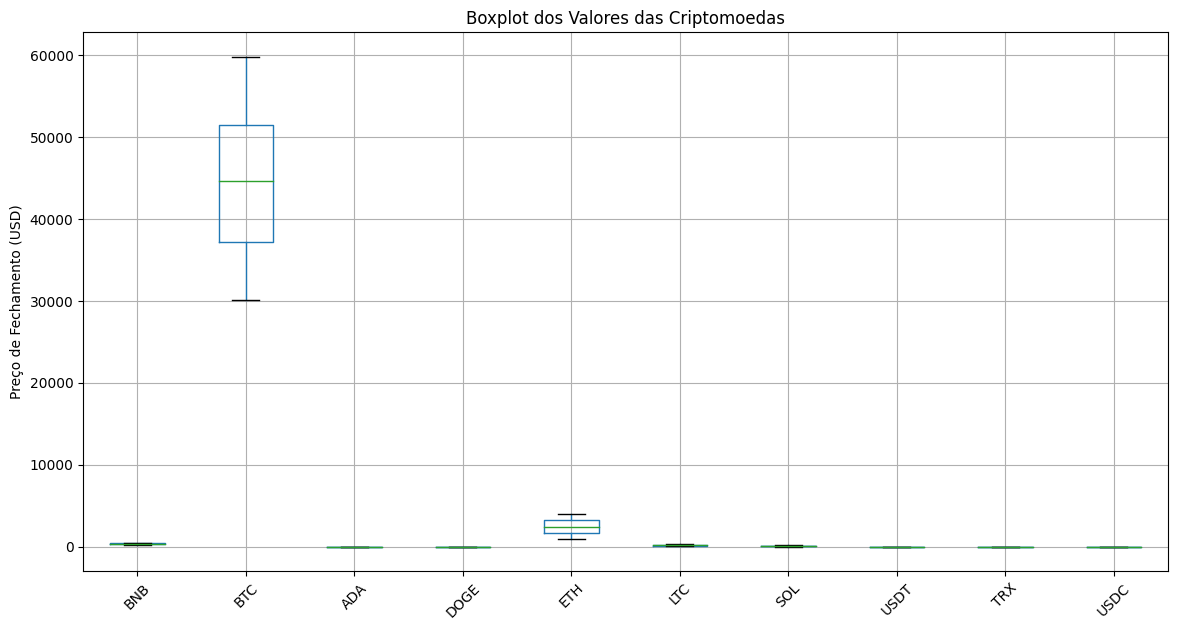

Maiores valores registrados para cada criptomoeda:
BNB       499.918938
BTC     59800.109215
ADA         2.986880
DOGE        0.697944
ETH      3979.387957
LTC       298.890944
SOL       199.287749
USDT        1.019936
TRX         0.149884
USDC        1.019949
dtype: float64

Menores valores registrados para cada criptomoeda:
BNB       201.652132
BTC     30101.863026
ADA         0.500580
DOGE        0.050093
ETH      1004.756558
LTC       101.360443
SOL        21.284717
USDT        0.980022
TRX         0.050313
USDC        0.980065
dtype: float64


In [4]:
# Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Criar DataFrames fictícios
dates = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')

data_dict = {
    'BNB': np.random.uniform(low=200, high=500, size=len(dates)),
    'BTC': np.random.uniform(low=30000, high=60000, size=len(dates)),
    'ADA': np.random.uniform(low=0.5, high=3, size=len(dates)),
    'DOGE': np.random.uniform(low=0.05, high=0.7, size=len(dates)),
    'ETH': np.random.uniform(low=1000, high=4000, size=len(dates)),
    'LTC': np.random.uniform(low=100, high=300, size=len(dates)),
    'SOL': np.random.uniform(low=20, high=200, size=len(dates)),
    'USDT': np.random.uniform(low=0.98, high=1.02, size=len(dates)),
    'TRX': np.random.uniform(low=0.05, high=0.15, size=len(dates)),
    'USDC': np.random.uniform(low=0.98, high=1.02, size=len(dates))
}

dfs = {key: pd.DataFrame(data={'Date': dates, 'Close': values}) for key, values in data_dict.items()}

# Função para limpar os dados
def clean_data(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df = df[['Close']]
    df = df.apply(pd.to_numeric, errors='coerce')
    return df

for key in dfs:
    try:
        dfs[key] = clean_data(dfs[key])
        dfs[key].rename(columns={'Close': key}, inplace=True)
    except Exception as e:
        print(f"Erro ao limpar dados de {key}: {e}")

crypto_df = pd.concat(dfs.values(), axis=1)

# Pergunta 8: Qual é a distribuição dos valores para cada criptomoeda?

# Plotar histogramas para cada criptomoeda
plt.figure(figsize=(14, 7))
for column in crypto_df.columns:
    crypto_df[column].plot(kind='hist', alpha=0.5, bins=50, label=column)
plt.legend()
plt.title('Distribuição dos Valores das Criptomoedas')
plt.xlabel('Preço de Fechamento (USD)')
plt.ylabel('Frequência')
plt.show()

# Plotar boxplots para cada criptomoeda
plt.figure(figsize=(14, 7))
crypto_df.boxplot()
plt.title('Boxplot dos Valores das Criptomoedas')
plt.ylabel('Preço de Fechamento (USD)')
plt.xticks(rotation=45)
plt.show()

# Pergunta 9: Qual foi o maior e o menor valor registrado para cada criptomoeda ao longo do período analisado?

# Encontrar os maiores e menores valores para cada criptomoeda
max_values = crypto_df.max()
min_values = crypto_df.min()

print("Maiores valores registrados para cada criptomoeda:")
print(max_values)

print("\nMenores valores registrados para cada criptomoeda:")
print(min_values)


# Importação para o Banco de Dados



* Conexão do banco de dados com a ferramenta de visualização de dados